In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
from sklearn.linear_model import LinearRegression,LogisticRegression,LogisticRegressionCV
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVR


In [32]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [33]:
wing_df = pd.read_csv('data/Wings.csv')

In [34]:
wing_df.head()

,Unnamed: 0,Name,Nationality,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,positions,Category
0,103,Nicolás Gaitán,Argentina,Atlético Madrid,Sub,23.0,07/01/2016,2020.0,84,173 cm,68 kg,Left,02/23/1988,29,LM,Medium / Medium,2,4,85,86,30,43,42,57,84,79,40,82,80,83,82,78,85,80,71,50,81,87,68,54,72,73,74,88,72,71,81,7,8,9,11,5,LM,3
1,213,Yevhen Konoplyanka,Ukraine,FC Schalke 04,Sub,11.0,07/09/2015,2019.0,82,178 cm,78 kg,Right,09/29/1989,27,LM,Medium / Medium,4,4,85,86,21,31,38,48,76,75,37,79,77,79,81,78,89,88,66,58,78,81,66,49,77,80,84,83,80,75,67,9,5,15,11,9,LM,3
2,457,Stephan El Shaarawy,Italy,Roma,Sub,92.0,01/26/2016,2020.0,80,178 cm,72 kg,Right,10/27/1992,24,LW,High / Medium,2,5,87,84,25,25,30,54,72,76,36,73,71,70,74,57,86,87,72,55,82,85,60,51,74,75,74,80,63,72,77,5,5,5,3,3,LW,3
3,539,Rafa,Portugal,SL Benfica,Sub,27.0,08/31/2016,2021.0,79,170 cm,63 kg,Right,05/17/1993,23,LM,High / Medium,4,4,80,84,23,31,38,40,81,82,43,75,77,74,75,63,91,92,68,30,85,91,65,56,71,65,66,76,56,59,64,12,9,11,11,8,LM,3
4,692,Alexandr Samedov,Russia,Spartak Moscow,Sub,19.0,01/25/2017,2018.0,79,177 cm,75 kg,Right,07/19/1984,32,RM,High / Medium,3,3,78,74,52,47,52,73,78,77,42,80,74,80,80,69,81,80,82,68,71,78,64,59,73,74,75,86,79,81,61,11,8,8,8,12,RM,3


In [35]:
wing_df.columns

Index(['Unnamed: 0', 'Name', 'Nationality', 'Club', 'Club_Position', 'Club_Kit', 'Club_Joining', 'Contract_Expiry', 'Rating', 'Height', 'Weight', 'Preffered_Foot', 'Birth_Date', 'Age', 'Preffered_Position', 'Work_Rate', 'Weak_foot', 'Skill_Moves', 'Ball_Control', 'Dribbling', 'Marking', 'Sliding_Tackle', 'Standing_Tackle', 'Aggression', 'Reactions', 'Attacking_Position', 'Interceptions', 'Vision', 'Composure', 'Crossing', 'Short_Pass', 'Long_Pass', 'Acceleration', 'Speed', 'Stamina', 'Strength', 'Balance', 'Agility', 'Jumping', 'Heading', 'Shot_Power', 'Finishing', 'Long_Shots', 'Curve', 'Freekick_Accuracy', 'Penalties', 'Volleys', 'GK_Positioning', 'GK_Diving', 'GK_Kicking', 'GK_Handling', 'GK_Reflexes', 'positions', 'Category'], dtype='object')

In [36]:
wing_lr = wing_df.drop(['Unnamed: 0','Height', 'Weight','Nationality','Club','Club_Position',
        'Club_Kit', 'Club_Joining', 'Contract_Expiry','Preffered_Foot','Category',
        'Birth_Date','Preffered_Position','GK_Positioning',
        'GK_Diving', 'GK_Kicking', 'GK_Handling','GK_Reflexes'], 
         axis = 1)

In [37]:
corr = pd.DataFrame(wing_lr.corr())

In [38]:
corr.sort_values('Rating', ascending = False, inplace = True)

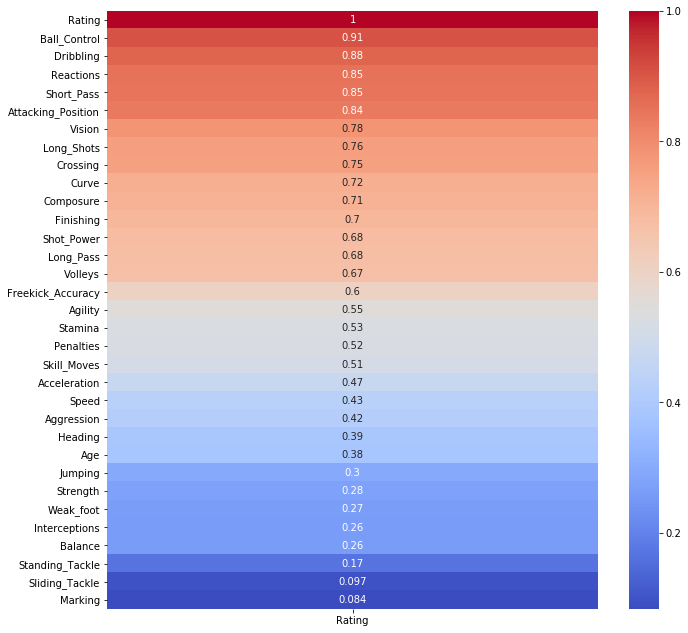

In [39]:
plt.figure(figsize=(11,11))
sns.heatmap(corr[['Rating']],annot = True, cmap='coolwarm');

In [40]:
corr

,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
Rating,1.000000,0.383534,0.266262,0.510695,0.908918,0.878021,0.083737,0.096720,0.169475,0.417139,0.850768,0.836070,0.262153,0.782565,0.711770,0.754423,0.846948,0.675721,0.471949,0.430570,0.529681,0.275018,0.261316,0.550308,0.295991,0.389733,0.684013,0.697608,0.756999,0.719325,0.603327,0.524951,0.668234
Ball_Control,0.908918,0.305373,0.258700,0.539141,1.000000,0.897433,0.021824,0.028388,0.097601,0.314274,0.737252,0.733751,0.172661,0.732432,0.668317,0.688545,0.801220,0.627366,0.368161,0.313808,0.370865,0.196239,0.252192,0.497047,0.172147,0.310731,0.645893,0.652531,0.708719,0.710497,0.581054,0.509876,0.660713
Dribbling,0.878021,0.217729,0.256883,0.579941,0.897433,1.000000,-0.076047,-0.053121,0.012577,0.242488,0.681934,0.705541,0.083637,0.678125,0.622762,0.634552,0.722426,0.536540,0.486021,0.429429,0.317697,0.135802,0.301986,0.581763,0.177313,0.231917,0.611742,0.660316,0.672431,0.675601,0.521751,0.482241,0.623586
Reactions,0.850768,0.451263,0.222338,0.385472,0.737252,0.681934,0.149161,0.147765,0.219021,0.464429,1.000000,0.761072,0.333320,0.672450,0.664380,0.600928,0.737517,0.586152,0.300222,0.267719,0.489480,0.303654,0.190098,0.440488,0.308441,0.427684,0.571469,0.551994,0.661113,0.600241,0.522305,0.437264,0.572996
Short_Pass,0.846948,0.375545,0.234551,0.390024,0.801220,0.722426,0.190896,0.198656,0.272195,0.383918,0.737517,0.687125,0.321028,0.768823,0.651366,0.711755,1.000000,0.811309,0.205514,0.164649,0.415056,0.229862,0.194581,0.382084,0.194553,0.328910,0.575412,0.536116,0.663160,0.663178,0.594355,0.447760,0.562465
Attacking_Position,0.836070,0.398715,0.214266,0.418676,0.733751,0.705541,-0.015172,-0.011106,0.069051,0.380526,0.761072,1.000000,0.181981,0.696787,0.655165,0.574815,0.687125,0.526607,0.331642,0.314675,0.423017,0.307121,0.140782,0.401542,0.268573,0.432511,0.651696,0.718876,0.694038,0.576803,0.494748,0.537317,0.638557
Vision,0.782565,0.378323,0.229138,0.428341,0.732432,0.678125,0.087034,0.095787,0.162352,0.320117,0.672450,0.696787,0.230577,1.000000,0.680390,0.654951,0.768823,0.708349,0.200843,0.148111,0.383209,0.200613,0.198102,0.372918,0.164297,0.246317,0.557744,0.576188,0.668580,0.678565,0.615306,0.479688,0.591959
Long_Shots,0.756999,0.422934,0.254050,0.415978,0.708719,0.672431,0.010606,-0.003072,0.079435,0.361094,0.661113,0.694038,0.185622,0.668580,0.617415,0.588053,0.663160,0.563094,0.251700,0.204189,0.401233,0.299662,0.148857,0.410266,0.250916,0.380571,0.761376,0.703809,1.000000,0.696627,0.640518,0.545802,0.703860
Crossing,0.754423,0.392192,0.205509,0.351067,0.688545,0.634552,0.188686,0.201749,0.250367,0.332338,0.600928,0.574815,0.305805,0.654951,0.530450,1.000000,0.711755,0.676268,0.223214,0.193937,0.376198,0.194023,0.181626,0.336200,0.143319,0.194092,0.525282,0.439207,0.588053,0.667639,0.605158,0.379311,0.487476
Curve,0.719325,0.381105,0.235153,0.440532,0.710497,0.675601,0.047458,0.044506,0.113767,0.319675,0.600241,0.576803,0.194166,0.678565,0.622262,0.667639,0.663178,0.586212,0.242651,0.181017,0.310711,0.147213,0.226067,0.409429,0.149230,0.213921,0.603318,0.517328,0.696627,1.000000,0.744283,0.501856,0.633379


In [41]:
wing_rating_features = ['Ball_Control','Dribbling','Reactions','Short_Pass',
                        'Attacking_Position','Vision','Long_Shots','Crossing',
                        'Curve','Freekick_Accuracy','Acceleration','Speed']

In [42]:
X_wing_lr = wing_df[wing_rating_features]

y_wing_lr = wing_df[['Rating']]

X_wing_train, X_wing_test, y_wing_train, y_wing_test = train_test_split(X_wing_lr,
                                                    y_wing_lr,
                                                    test_size=0.30, 
                                                    random_state=77)

In [43]:
lr_wing = LinearRegression()

lr_wing.fit(X_wing_train, y_wing_train)

print(f' CV: {cross_val_score(lr_wing, X_wing_train, y_wing_train, cv = 5).mean()}')
print(f' Train: {lr_wing.score(X_wing_train, y_wing_train)}')
print(F' Test: {lr_wing.score(X_wing_test, y_wing_test)}')

 CV: 0.9580374687406479
 Train: 0.9602527641749756
 Test: 0.9657273010064703
